In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dcor

'parameter_distribution.png'

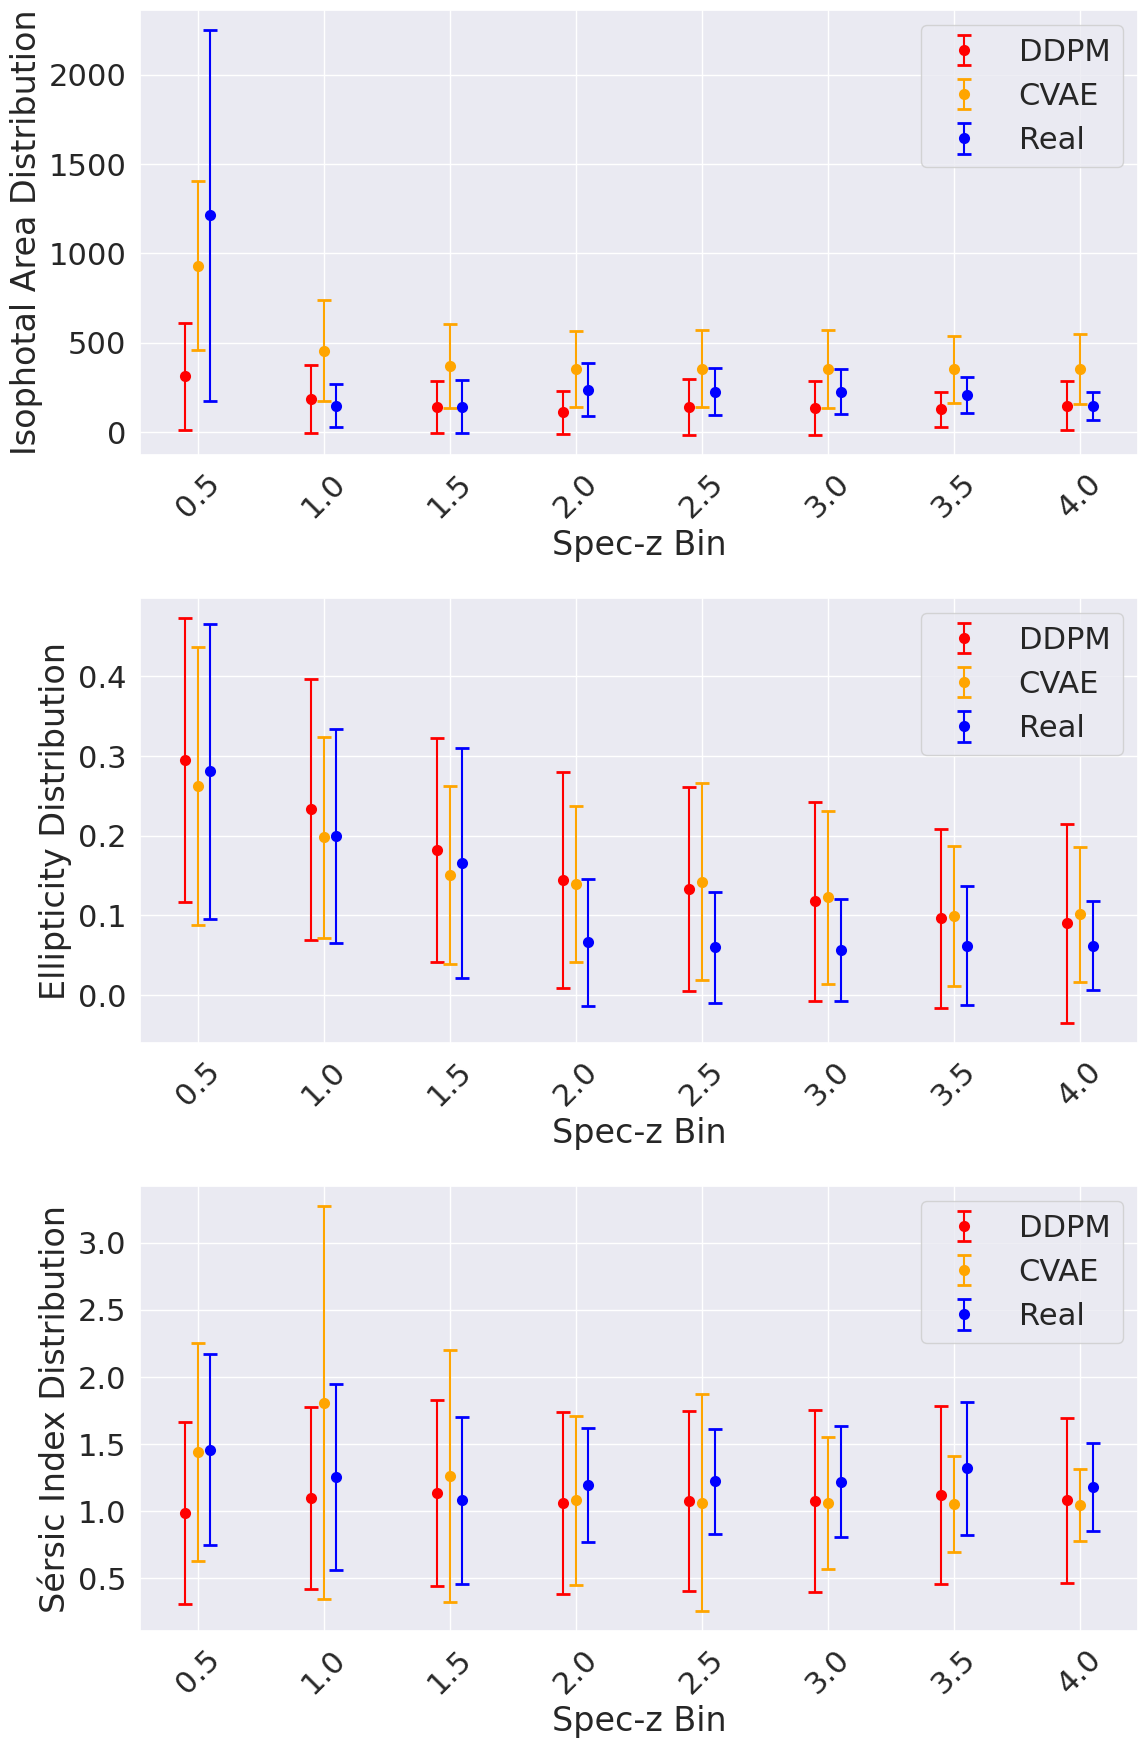

In [18]:
plt.rcParams.update({'font.size': 25})
sns.set(font_scale=2)

df = pd.read_csv('/data/HSC_generated/HSC_generated_v1/ddpm/g_band_ddpm/shape_parameters.csv')
df_cvae = pd.read_csv('/data/HSC_generated/HSC_generated_v1/cvae/g_band_cvae/shape_parameters.csv')
df_real = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')

# Define bins and parameters
bins = np.arange(0, 4 + 0.5, 0.5)
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

# Bin the data
df['specz_bins'] = pd.cut(df['specz'], bins=bins)
df_cvae['specz_bins'] = pd.cut(df_cvae['specz'], bins=bins)
df_real['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

# Refactored functions
def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            return np.mean(bin[param]), np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()
    mean_df.columns = ['specz_bin', 'mean', 'std']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    return mean_df

def plot_error_bars_updated(mean_df, std, label, color, offset, ax):
    ax.errorbar(x=np.arange(len(mean_df)) + offset, y=mean_df['mean'], yerr=std, fmt='o', capsize=5, ecolor=color, color=color, label=label, markerfacecolor=color, markeredgewidth=2)

# Create a vertical subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, param in enumerate(params):
    ax = axes[i]

    mean_df = process_dataframe(df, param)
    mean_df_cvae = process_dataframe(df_cvae, param)
    mean_df_real = process_dataframe(df_real, param)

    plot_error_bars_updated(mean_df, mean_df['std'], 'DDPM', 'red', -0.1, ax)
    plot_error_bars_updated(mean_df_cvae, mean_df_cvae['std'], 'CVAE', 'orange', 0, ax)
    plot_error_bars_updated(mean_df_real, mean_df_real['std'], 'Real', 'blue', 0.1, ax)

    ax.set_xticks(np.arange(len(mean_df)))
    ax.set_xticklabels(mean_df['specz_bin'], rotation=45)
    ax.set_xlabel('Spec-z Bin')
    ax.set_ylabel(f'{param_names[i]} Distribution')
    ax.legend()

plt.tight_layout()

# Save the figure as a PNG file
output_path = 'parameter_distribution.png'
fig.savefig(output_path)

output_path

df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

bins = np.arange(0, 4+0.5, 0.5)
df_real_temp['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            return np.mean(np.log(bin[param] + 1)), 0 # np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()
    mean_df.columns = ['specz_bin', 'mean', 'std']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    return mean_df

def plot_error_bars_updated(mean_df, std, label, color, offset):
    plt.errorbar(x=np.arange(len(mean_df)) + offset, y=mean_df['mean'], yerr=std, fmt='o', capsize=5, ecolor=color, color=color, label=label, markerfacecolor=color, markeredgewidth=2)

# Adding 'ERRCXY_IMAGE' to the list of parameters to plot
params.append('ERRCXY_IMAGE')
param_names.append('ERRCXY_IMAGE')

# Plotting for 'ERRCXY_IMAGE'
param = 'ERRCXY_IMAGE'
mean_df = process_dataframe(df, param)
mean_df_cvae = process_dataframe(df_cvae, param)
mean_df_real = process_dataframe(df_real_temp, param)

plt.figure(figsize=(12,6))

plot_error_bars_updated(mean_df, mean_df['std'], 'DDPM', 'red', -0.1)
plot_error_bars_updated(mean_df_cvae, mean_df_cvae['std'], 'CVAE', 'orange', 0)
plot_error_bars_updated(mean_df_real, mean_df_real['std'], 'Real', 'blue', 0.1)

plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)
plt.xlabel('Spec-z Bin')
plt.ylabel(f'ERRCXY_IMAGE Distribution')
# plt.ylim(0, 10000)
plt.legend()
plt.show()

df = pd.read_csv('/data/HSC_generated/HSC_generated_v1/ddpm/g_band_ddpm/shape_parameters.csv')
df_cvae = pd.read_csv('/data/HSC_generated/HSC_generated_v1/cvae/g_band_cvae/shape_parameters.csv')
df_real = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')

bins = np.arange(0, 4+0.5, 0.5)
df['specz_bins'] = pd.cut(df['specz'], bins=bins)
df_cvae['specz_bins'] = pd.cut(df_cvae['specz'], bins=bins)
df_real['specz_bins'] = pd.cut(df_real['specz'], bins=bins)
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

# Refactored functions
def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            return np.mean(bin[param]), np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()
    mean_df.columns = ['specz_bin', 'mean', 'std']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    return mean_df

def plot_error_bars_updated(mean_df, std, label, color, offset):
    plt.errorbar(x=np.arange(len(mean_df)) + offset, y=mean_df['mean'], yerr=std, fmt='o', capsize=5, ecolor=color, color=color, label=label, markerfacecolor=color, markeredgewidth=2)

# Plotting
for i, param in enumerate(params):
    mean_df = process_dataframe(df, param)
    mean_df_cvae = process_dataframe(df_cvae, param)
    mean_df_real = process_dataframe(df_real, param)

    plt.figure(figsize=(12,6))

    plot_error_bars_updated(mean_df, mean_df['std'], 'DDPM', 'red', -0.1)
    plot_error_bars_updated(mean_df_cvae, mean_df_cvae['std'], 'CVAE', 'orange', 0)
    plot_error_bars_updated(mean_df_real, mean_df_real['std'], 'Real', 'blue', 0.1)

    plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'{param_names[i]} Distribution')
    plt.legend()
    plt.show()

df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

bins = np.arange(0, 4+0.5, 0.5)
df_real_temp['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

# Refactored functions
def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            non_zero_values = bin[param][bin[param] > 0]
            mean_value = np.mean(np.log(non_zero_values)) if len(non_zero_values) > 0 else np.nan
            return mean_value, np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()

    # Format the 'specz_bin' column to show the range of each bin
    mean_df['specz_bin'] = mean_df['specz_bins'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")

    mean_df.columns = ['specz_bin', 'mean', 'std']
    return mean_df

def plot_with_seaborn(df, param, label, color, linestyle):
    
    
    mean_df = process_dataframe(df, param)
    sns.set(font_scale=1.5)
    sns.lineplot(x=np.arange(len(mean_df)), y=mean_df['mean'], label=label, color=color, linestyle=linestyle)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12,6))

# Define line styles for different parameters
linestyles = ['-']

# Plotting the data for 'ERRCXY_IMAGE'
plot_with_seaborn(df, 'ERRCXY_IMAGE', 'DDPM', 'red', linestyles[0])
plot_with_seaborn(df_cvae, 'ERRCXY_IMAGE', 'CVAE', 'orange', linestyles[0])
plot_with_seaborn(df_real_temp, 'ERRCXY_IMAGE', 'Real', 'blue', linestyles[0])

# Setting the x-ticks and labels
# Setting the x-ticks and labels with the updated 'specz_bin' column
mean_df = process_dataframe(df_real_temp, 'ERRCXY_IMAGE')
plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)


# plt.rcParams.update({'font.size': 18})

# Adding labels and legend
plt.xlabel('Spec-z Bin')
plt.ylabel('Galaxy Fitting Loss')
plt.legend()

# Save the figure as a PNG file
output_path = 'galaxy_fitting_loss.png'
plt.savefig(output_path)

# Display the plot
plt.show()

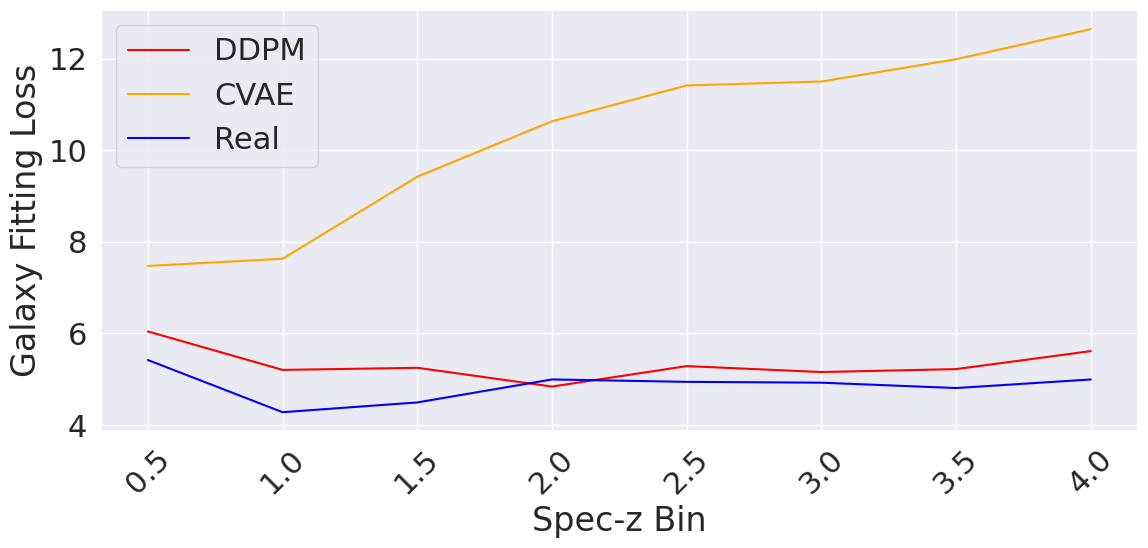

In [19]:
plt.rcParams.update({'font.size': 25})

df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

bins = np.arange(0, 4+0.5, 0.5)
df_real_temp['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

sns.set(font_scale=2)

# Refactored functions
def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            non_zero_values = bin[param][bin[param] > 0]
            mean_value = np.mean(np.log(non_zero_values)) if len(non_zero_values) > 0 else np.nan
            return mean_value, np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()
    mean_df.columns = ['specz_bin', 'mean', 'std']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    return mean_df

def plot_with_seaborn(df, param, label, color, linestyle):
    mean_df = process_dataframe(df, param)
    sns.set(font_scale=2)
    sns.lineplot(x=np.arange(len(mean_df)), y=mean_df['mean'], label=label, color=color, linestyle=linestyle)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12,6))

# Define line styles for different parameters
linestyles = ['-']

# Plotting the data for 'ERRCXY_IMAGE'
plot_with_seaborn(df, 'ERRCXY_IMAGE', 'DDPM', 'red', linestyles[0])
plot_with_seaborn(df_cvae, 'ERRCXY_IMAGE', 'CVAE', 'orange', linestyles[0])
plot_with_seaborn(df_real_temp, 'ERRCXY_IMAGE', 'Real', 'blue', linestyles[0])

# Setting the x-ticks and labels
mean_df = process_dataframe(df_real_temp, 'ERRCXY_IMAGE')
plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)

# plt.rcParams.update({'font.size': 18})

# Adding labels and legend
plt.xlabel('Spec-z Bin')
plt.ylabel('Galaxy Fitting Loss')
plt.legend()

plt.tight_layout()

# Save the figure as a PNG file
output_path = 'galaxy_fitting_loss.png'
plt.savefig(output_path)

# Display the plot
plt.show()

In [4]:
df = pd.read_csv('/data/HSC_generated/HSC_generated_v1/ddpm/g_band_ddpm/shape_parameters.csv')
df_cvae = pd.read_csv('/data/HSC_generated/HSC_generated_v1/cvae/g_band_cvae/shape_parameters.csv')
df_real = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')
df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

def mean_std(bin):
    param = 'ERRCXY_IMAGE'
    if len(bin) > 1:
        non_zero_values = bin[param][bin[param] > 0]
        mean_value = np.mean(np.log(non_zero_values)) if len(non_zero_values) > 0 else np.nan
        return mean_value, np.std(bin[param])
    else:
        return np.nan, np.nan

print(mean_std(df_real_temp))
print(mean_std(df))
print(mean_std(df_cvae))

(4.92272276131013, 26798.88130817534)
(5.320677396846365, 1864.716769708568)
(10.170372891311407, 1335326.2117632742)


df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

bins = np.arange(0, 4+0.5, 0.5)
df_real_temp['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

def calculate_mean_std(data, param):
    def mean_std(bin):
        if len(bin) > 1:
            return np.mean(np.log(bin[param] + 1)), 0 # np.std(bin[param])
        else:
            return np.nan, np.nan
    return data.groupby('specz_bins').apply(mean_std)

def process_dataframe(df, param):
    mean_std_results = calculate_mean_std(df, param)
    mean_df = mean_std_results.apply(pd.Series).reset_index()
    mean_df.columns = ['specz_bin', 'mean', 'std']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    return mean_df

def plot_error_bars_updated(mean_df, std, label, color, offset):
    plt.errorbar(x=np.arange(len(mean_df)) + offset, y=mean_df['mean'], yerr=std, fmt='o', capsize=5, ecolor=color, color=color, label=label, markerfacecolor=color, markeredgewidth=2)

# Adding 'ERRCXX_IMAGE' to the list of parameters to plot
params.append('ERRCXX_IMAGE')
param_names.append('ERRCXX_IMAGE')

# Plotting for 'ERRCXX_IMAGE'
param = 'ERRCXX_IMAGE'
mean_df = process_dataframe(df, param)
mean_df_cvae = process_dataframe(df_cvae, param)
mean_df_real = process_dataframe(df_real_temp, param)

plt.figure(figsize=(12,6))

plot_error_bars_updated(mean_df, mean_df['std'], 'DDPM', 'red', -0.1)
plot_error_bars_updated(mean_df_cvae, mean_df_cvae['std'], 'CVAE', 'orange', 0)
plot_error_bars_updated(mean_df_real, mean_df_real['std'], 'Real', 'blue', 0.1)

plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)
plt.xlabel('Spec-z Bin')
plt.ylabel(f'ERRCXX_IMAGE Distribution')
# plt.ylim(0, 10000)
plt.legend()
plt.show()

import seaborn as sns

# Read your data
df_real_temp = pd.read_csv('/data/HSC_generated/HSC_generated_v1/g_band_shape_parameters.csv')

# Your existing preprocessing steps
bins = np.arange(0, 4+0.5, 0.5)
df_real_temp['specz_bins'] = pd.cut(df_real_temp['specz'], bins=bins)
# ... [your existing functions]

def plot_with_seaborn(df, param, label, color):
    # Processing the dataframe
    mean_df = process_dataframe(df, param)

    # Using Seaborn's lineplot function for plotting
    sns.lineplot(x=np.arange(len(mean_df)), y=mean_df['mean'], label=label, color=color)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12,6))

# Plotting the data
plot_with_seaborn(df, 'ERRCXY_IMAGE', 'DDPM', 'red')
plot_with_seaborn(df_cvae, 'ERRCXY_IMAGE', 'CVAE', 'orange')
plot_with_seaborn(df_real_temp, 'ERRCXY_IMAGE', 'Real', 'blue')

# Setting the x-ticks and labels
mean_df = process_dataframe(df_real_temp, 'ERRCXX_IMAGE')
plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)

# Adding labels and legend
plt.xlabel('Spec-z Bin')
plt.ylabel('ERRCXX_IMAGE Distribution')
plt.legend()

# Display the plot
plt.show()

def plot_with_seaborn(df, param, label, color, linestyle):
    # Processing the dataframe for the given parameter
    mean_df = process_dataframe(df, param)

    # Using Seaborn's lineplot function for plotting
    sns.lineplot(x=np.arange(len(mean_df)), y=mean_df['mean'], label=f'{label} ({param})', color=color, linestyle=linestyle)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12,6))

# Define line styles for different parameters
linestyles = ['-', '--', ':']

# Plotting the data for each parameter
for i, param in enumerate(['ERRCXX_IMAGE', 'ERRCXY_IMAGE', 'ERRCYY_IMAGE']):
    plot_with_seaborn(df, param, 'DDPM', 'red', linestyles[i])
    plot_with_seaborn(df_cvae, param, 'CVAE', 'orange', linestyles[i])
    plot_with_seaborn(df_real_temp, param, 'Real', 'blue', linestyles[i])

# Setting the x-ticks and labels
mean_df = process_dataframe(df_real_temp, 'ERRCXX_IMAGE')
plt.xticks(np.arange(len(mean_df)), mean_df['specz_bin'], rotation=45)

# Adding labels and legend
plt.xlabel('Spec-z Bin')
plt.ylabel('Log Fitting Uncertainty')
plt.legend()

# Display the plot
plt.show()

bins

# Selecting the first bin
first_bin = bins[2]

# Filtering data for the first bin
df_first_bin = df[df['specz_bins'].apply(lambda x: x.left == first_bin)]
df_cvae_first_bin = df_cvae[df_cvae['specz_bins'].apply(lambda x: x.left == first_bin)]
df_real_first_bin = df_real[df_real['specz_bins'].apply(lambda x: x.left == first_bin)]

# Function to plot histograms
def plot_histograms(dfs, param, param_name, ax):
    colors = ['red', 'orange', 'blue']
    labels = ['DDPM', 'CVAE', 'Real']
    for df, color, label in zip(dfs, colors, labels):
        data = df[param].dropna()  # Remove NaN values
        ax.hist(data, bins=30, density=True, alpha=0.5, color=color, label=f'{label} {param_name}')

# Plotting histograms for each parameter
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (param, param_name) in enumerate(zip(params, param_names)):
    plot_histograms([df_first_bin, df_cvae_first_bin, df_real_first_bin], param, param_name, axes[i])
    axes[i].set_xlabel(param_name)
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

axes[0].set_title('Probability Density Histogram of Parameters for the First Bin')
plt.tight_layout()
plt.show()

array_ddpm, hist_bins, _ = plt.hist(df_first_bin['ISOAREA_IMAGE'].dropna(), density=True, label='ddpm', range=(0, 2500), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = plt.hist(df_cvae_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = plt.hist(df_real_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.75, color = 'blue')[0]
plt.legend()

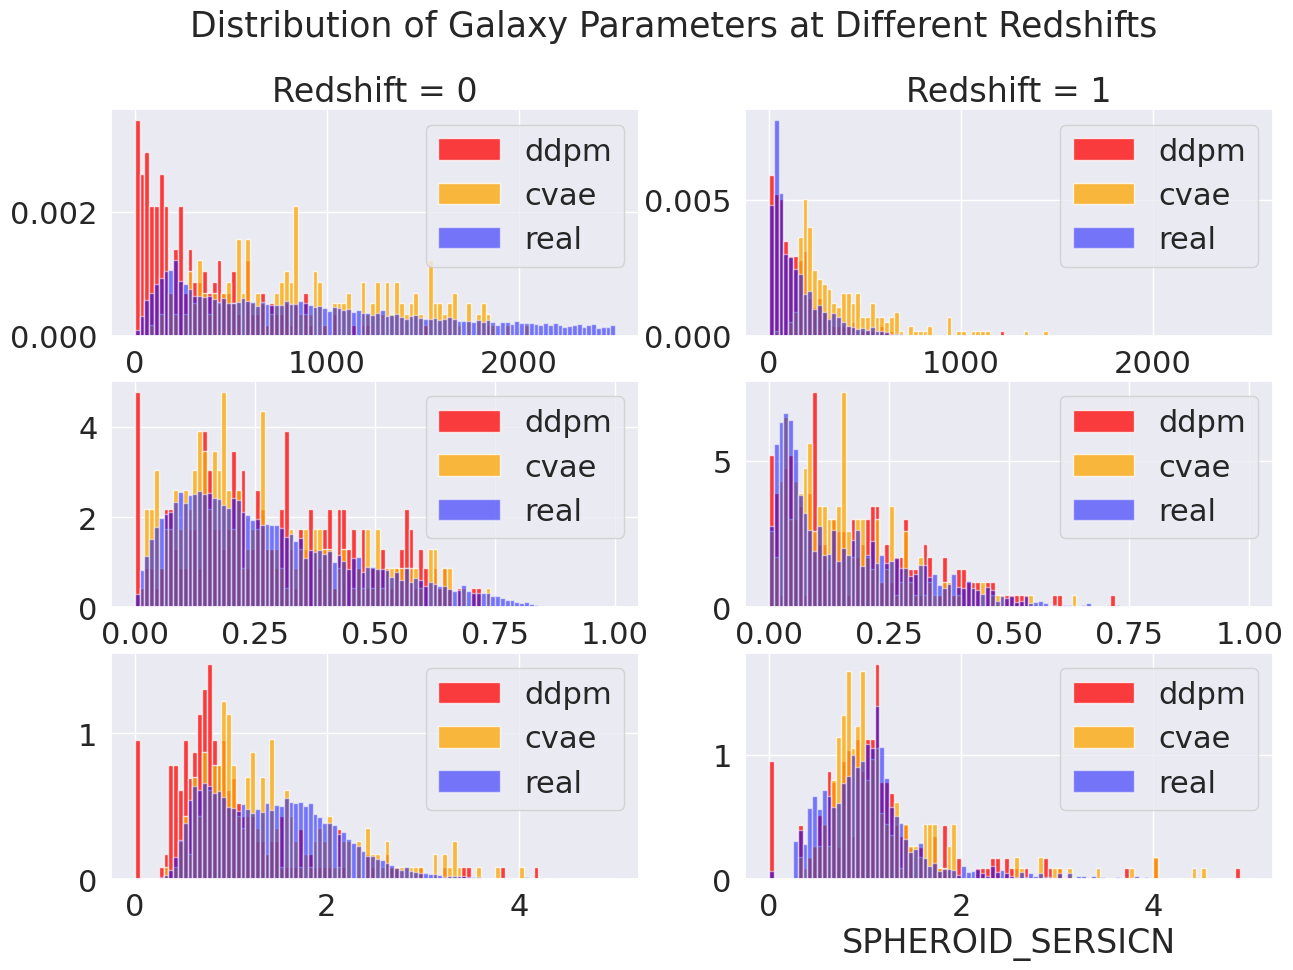

In [20]:
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(15, 10))

# Selecting the first bin
first_bin = bins[0]

# Filtering data for the first bin
df_first_bin = df[df['specz_bins'].apply(lambda x: x.left == first_bin)]
df_cvae_first_bin = df_cvae[df_cvae['specz_bins'].apply(lambda x: x.left == first_bin)]
df_real_first_bin = df_real[df_real['specz_bins'].apply(lambda x: x.left == first_bin)]

array_ddpm, hist_bins, _ = axs[0, 0].hist(df_first_bin['ISOAREA_IMAGE'].dropna(), density=True, label='ddpm', range=(0, 2500), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[0, 0].hist(df_cvae_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[0, 0].hist(df_real_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[0, 0].legend()
axs[0, 0].set_title('Redshift = 0')

array_ddpm, hist_bins, _ = axs[1, 0].hist(df_first_bin['ELLIPTICITY'].dropna(), density=True, label='ddpm', range=(0, 1), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[1, 0].hist(df_cvae_first_bin['ELLIPTICITY'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[1, 0].hist(df_real_first_bin['ELLIPTICITY'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[1, 0].legend()

farray_ddpm, hist_bins, _ = axs[2, 0].hist(df_first_bin['SPHEROID_SERSICN'].dropna(), density=True, label='ddpm', range=(0, 5), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[2, 0].hist(df_cvae_first_bin['SPHEROID_SERSICN'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[2, 0].hist(df_real_first_bin['SPHEROID_SERSICN'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[2, 0].legend()

first_bin = bins[2]

# Filtering data for the first bin
df_first_bin = df[df['specz_bins'].apply(lambda x: x.left == first_bin)]
df_cvae_first_bin = df_cvae[df_cvae['specz_bins'].apply(lambda x: x.left == first_bin)]
df_real_first_bin = df_real[df_real['specz_bins'].apply(lambda x: x.left == first_bin)]

array_ddpm, hist_bins, _ = axs[0, 1].hist(df_first_bin['ISOAREA_IMAGE'].dropna(), density=True, label='ddpm', range=(0, 2500), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[0, 1].hist(df_cvae_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[0, 1].hist(df_real_first_bin['ISOAREA_IMAGE'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[0, 1].legend()
axs[0, 1].set_title('Redshift = 1')
axs[0, 1].set_xlabel('ISOAREA_IMAGE')

array_ddpm, hist_bins, _ = axs[1, 1].hist(df_first_bin['ELLIPTICITY'].dropna(), density=True, label='ddpm', range=(0, 1), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[1, 1].hist(df_cvae_first_bin['ELLIPTICITY'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[1, 1].hist(df_real_first_bin['ELLIPTICITY'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[1, 1].legend()
axs[1, 1].set_xlabel('ELLIPTICITY')

array_ddpm, hist_bins, _ = axs[2, 1].hist(df_first_bin['SPHEROID_SERSICN'].dropna(), density=True, label='ddpm', range=(0, 5), bins = 100, alpha=0.75, color = 'red')
# print(array_ddpm[1])
array_cvae = axs[2, 1].hist(df_cvae_first_bin['SPHEROID_SERSICN'].dropna(), bins = hist_bins, density=True, label='cvae', alpha=0.75, color = 'orange')[0]
array_real = axs[2, 1].hist(df_real_first_bin['SPHEROID_SERSICN'].dropna(), bins = hist_bins, density=True, label='real', alpha=0.5, color = 'blue')[0]
axs[2, 1].legend()
axs[2, 1].set_xlabel('SPHEROID_SERSICN')

fig.suptitle('Distribution of Galaxy Parameters at Different Redshifts', fontsize=25)

plt.show()

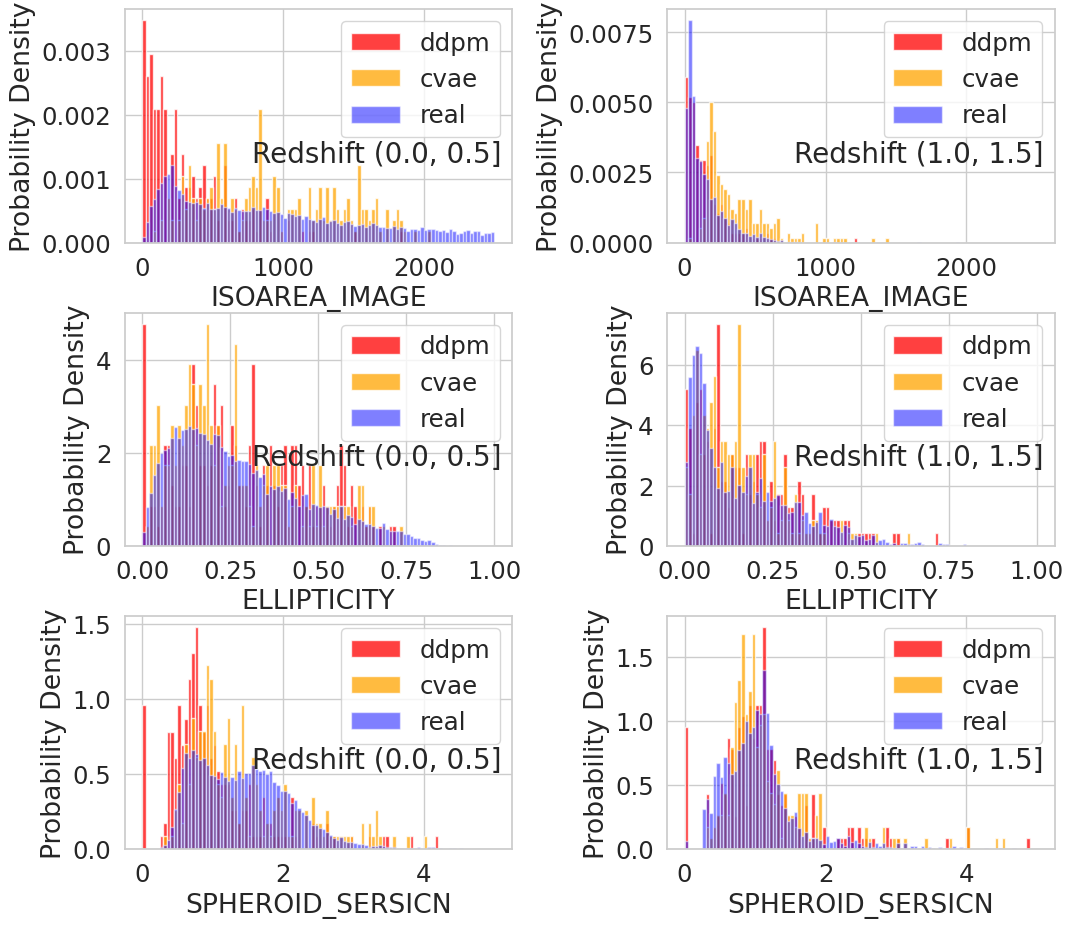

In [58]:
sns.set(font_scale=1.6)

import matplotlib.pyplot as plt

# Function to plot histograms
def plot_histogram(df, df_cvae, df_real, column, ax, bin_range, title='', xlabel=''):
    hist_bins = 100
    _, bins, _ = ax.hist(df[column].dropna(), density=True, range=bin_range, bins=hist_bins, alpha=0.75, color='red', label='ddpm')
    ax.hist(df_cvae[column].dropna(), bins=bins, density=True, alpha=0.75, color='orange', label='cvae')
    ax.hist(df_real[column].dropna(), bins=bins, density=True, alpha=0.5, color='blue', label='real')
    ax.legend()
    # ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability Density')
    # ax.get_yaxis().set_visible(False)  # Hide the y-axis numbers

# Set the style
sns.set_style('whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(12, 10))

# Plotting
bins_to_plot = [bins[0], bins[2]]  # Assuming 'bins' is defined elsewhere in your code
for i, bin_value in enumerate(bins_to_plot):
    # Filter data
    df_bin = df[df['specz_bins'].apply(lambda x: x.left == bin_value)]
    df_cvae_bin = df_cvae[df_cvae['specz_bins'].apply(lambda x: x.left == bin_value)]
    df_real_bin = df_real[df_real['specz_bins'].apply(lambda x: x.left == bin_value)]

    # Plot each parameter
    plot_histogram(df_bin, df_cvae_bin, df_real_bin, 'ISOAREA_IMAGE', axs[0, i], (0, 2500), 'Redshift = {}'.format(bin_value), 'ISOAREA_IMAGE')
    plot_histogram(df_bin, df_cvae_bin, df_real_bin, 'ELLIPTICITY', axs[1, i], (0, 1), xlabel='ELLIPTICITY')
    plot_histogram(df_bin, df_cvae_bin, df_real_bin, 'SPHEROID_SERSICN', axs[2, i], (0, 5), xlabel='SPHEROID_SERSICN')

# Set the main title
# fig.suptitle('Distribution of Galaxy Parameters at Different Redshifts', fontsize=25)

axs[0, 0].text(0.65, 0.38, 'Redshift (0.0, 0.5]', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transAxes, fontsize=20)
axs[0, 1].text(0.65, 0.38, 'Redshift (1.0, 1.5]', horizontalalignment='center', verticalalignment='center', transform=axs[0, 1].transAxes, fontsize=20)
axs[1, 0].text(0.65, 0.38, 'Redshift (0.0, 0.5]', horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes, fontsize=20)
axs[1, 1].text(0.65, 0.38, 'Redshift (1.0, 1.5]', horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes, fontsize=20)
axs[2, 0].text(0.65, 0.38, 'Redshift (0.0, 0.5]', horizontalalignment='center', verticalalignment='center', transform=axs[2, 0].transAxes, fontsize=20)
axs[2, 1].text(0.65, 0.38, 'Redshift (1.0, 1.5]', horizontalalignment='center', verticalalignment='center', transform=axs[2, 1].transAxes, fontsize=20)
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.subplots_adjust(top=0.95)
output_path = 'parameter_distribution_detail_no_share_y_axis.png'
plt.savefig(output_path)

# Show the plot
plt.show()

Weighted Average KL Divergence (CVAE vs Real): 0.2966670451533826
Weighted Average KL Divergence (DDPM vs Real): 0.37376639078821544
Weighted Average KL Divergence (CVAE vs Real): 0.19906408046805657
Weighted Average KL Divergence (DDPM vs Real): 0.1702628966274305
Weighted Average KL Divergence (CVAE vs Real): 0.18861642922640026
Weighted Average KL Divergence (DDPM vs Real): 0.1253039192244366


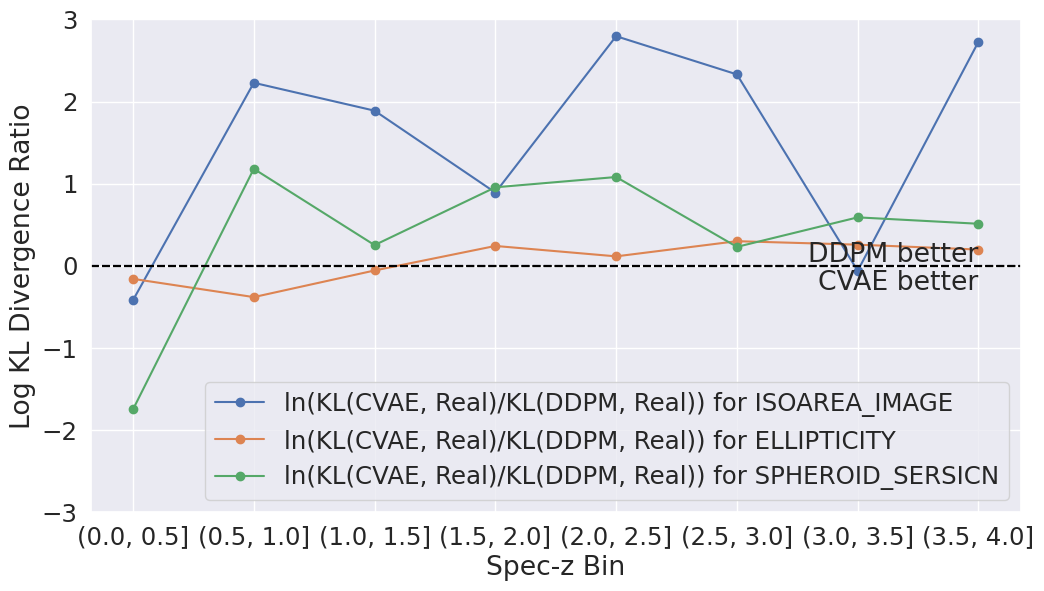

Galaxy KL Loss CVAE: 0.2281158516159465
Galaxy KL Loss DDPM: 0.22311106888002752


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
sns.set(font_scale=1.6)
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

def create_normalized_histogram(data, bins, min_range, max_range):
    hist, bin_edges = np.histogram(data, bins=bins, density=True, range=(min_range, max_range))
    min_nonzero = np.min(hist[np.nonzero(hist)])
    hist += min_nonzero * 1e-6  # Adding 1% of the minimum non-zero value to all entries
    return hist, bin_edges

def kl_divergence(p, q):
    return entropy(p, q)

plt.figure(figsize=(12, 6.4))

for param in params:
    kl_divs_cvae = []
    kl_divs_ddpm = []
    bin_labels = []

    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = 1 / 8 # num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting KL divergences
    
    ratio = np.array(kl_divs_cvae) / np.array(kl_divs_ddpm)
    plt.plot(bin_labels, np.log(ratio), marker='o', label=f'ln(KL(CVAE, Real)/KL(DDPM, Real)) for {param}')
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'Log KL Divergence Ratio')
    # plt.title(f'Galaxy KL Loss Across Spec-z Bins for Parameters')

    # Add horizontal line at y=0 (log(1) = 0)
    plt.axhline(y=0, color='black', linestyle='--')

    # Add text annotations
    
    plt.ylim(-3, 3)
    
    # plt.show()
    
    print(f'Weighted Average KL Divergence (CVAE vs Real): {weighted_kl_divs_cvae}')
    print(f'Weighted Average KL Divergence (DDPM vs Real): {weighted_kl_divs_ddpm}')

plt.legend()
    
plt.text(len(bin_labels) - 1, 0.05, 'DDPM better', horizontalalignment='right')
plt.text(len(bin_labels) - 1, -0.05, 'CVAE better', horizontalalignment='right', verticalalignment='top')    

output_path = 'galaxy_kl_loss.png'
plt.savefig(output_path)

plt.show()

print(f'Galaxy KL Loss CVAE: {(0.2966670451533826 + 0.19906408046805657 + 0.18861642922640026) / 3}')
print(f'Galaxy KL Loss DDPM: {(0.37376639078821544 + 0.1702628966274305 + 0.1253039192244366) / 3}')

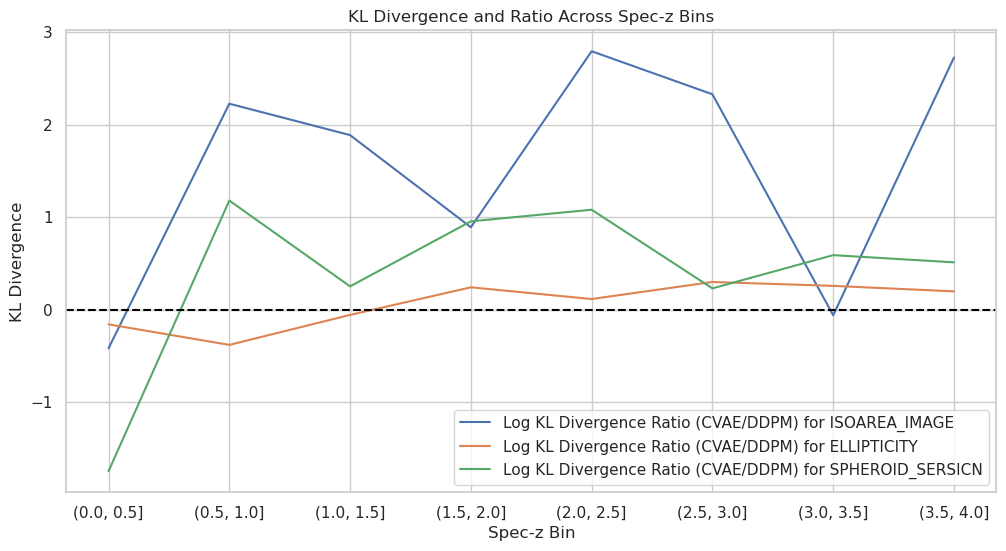

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# Assuming 'params' is a list of parameters to plot

def create_normalized_histogram(data, bins, min_range, max_range):
    hist, bin_edges = np.histogram(data, bins=bins, density=True, range=(min_range, max_range))
    min_nonzero = np.min(hist[np.nonzero(hist)])
    hist += min_nonzero * 1e-6  # Adding 1% of the minimum non-zero value to all entries
    return hist, bin_edges

def kl_divergence(p, q):
    return entropy(p, q)

# Seaborn styling
sns.set(style="whitegrid")

# Plotting all parameters in one figure
plt.figure(figsize=(12, 6))

for param in params:
    kl_divs_cvae = []
    kl_divs_ddpm = []
    ratio_kl_divs = []
    bin_labels = []

    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            ratio_kl_divs.append(np.log(kl_div_cvae / kl_div_ddpm))
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting each set of KL divergences
    # sns.lineplot(x=bin_labels, y=kl_divs_cvae, label=f'KL Divergence (CVAE vs Real) for {param}')
    # sns.lineplot(x=bin_labels, y=kl_divs_ddpm, label=f'KL Divergence (DDPM vs Real) for {param}')
    sns.lineplot(x=bin_labels, y=ratio_kl_divs, label=f'Log KL Divergence Ratio (CVAE/DDPM) for {param}')

plt.xlabel('Spec-z Bin')
plt.ylabel('KL Divergence')
plt.title('KL Divergence and Ratio Across Spec-z Bins')
plt.legend()

# Add horizontal line at y=0 (log(1) = 0)
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

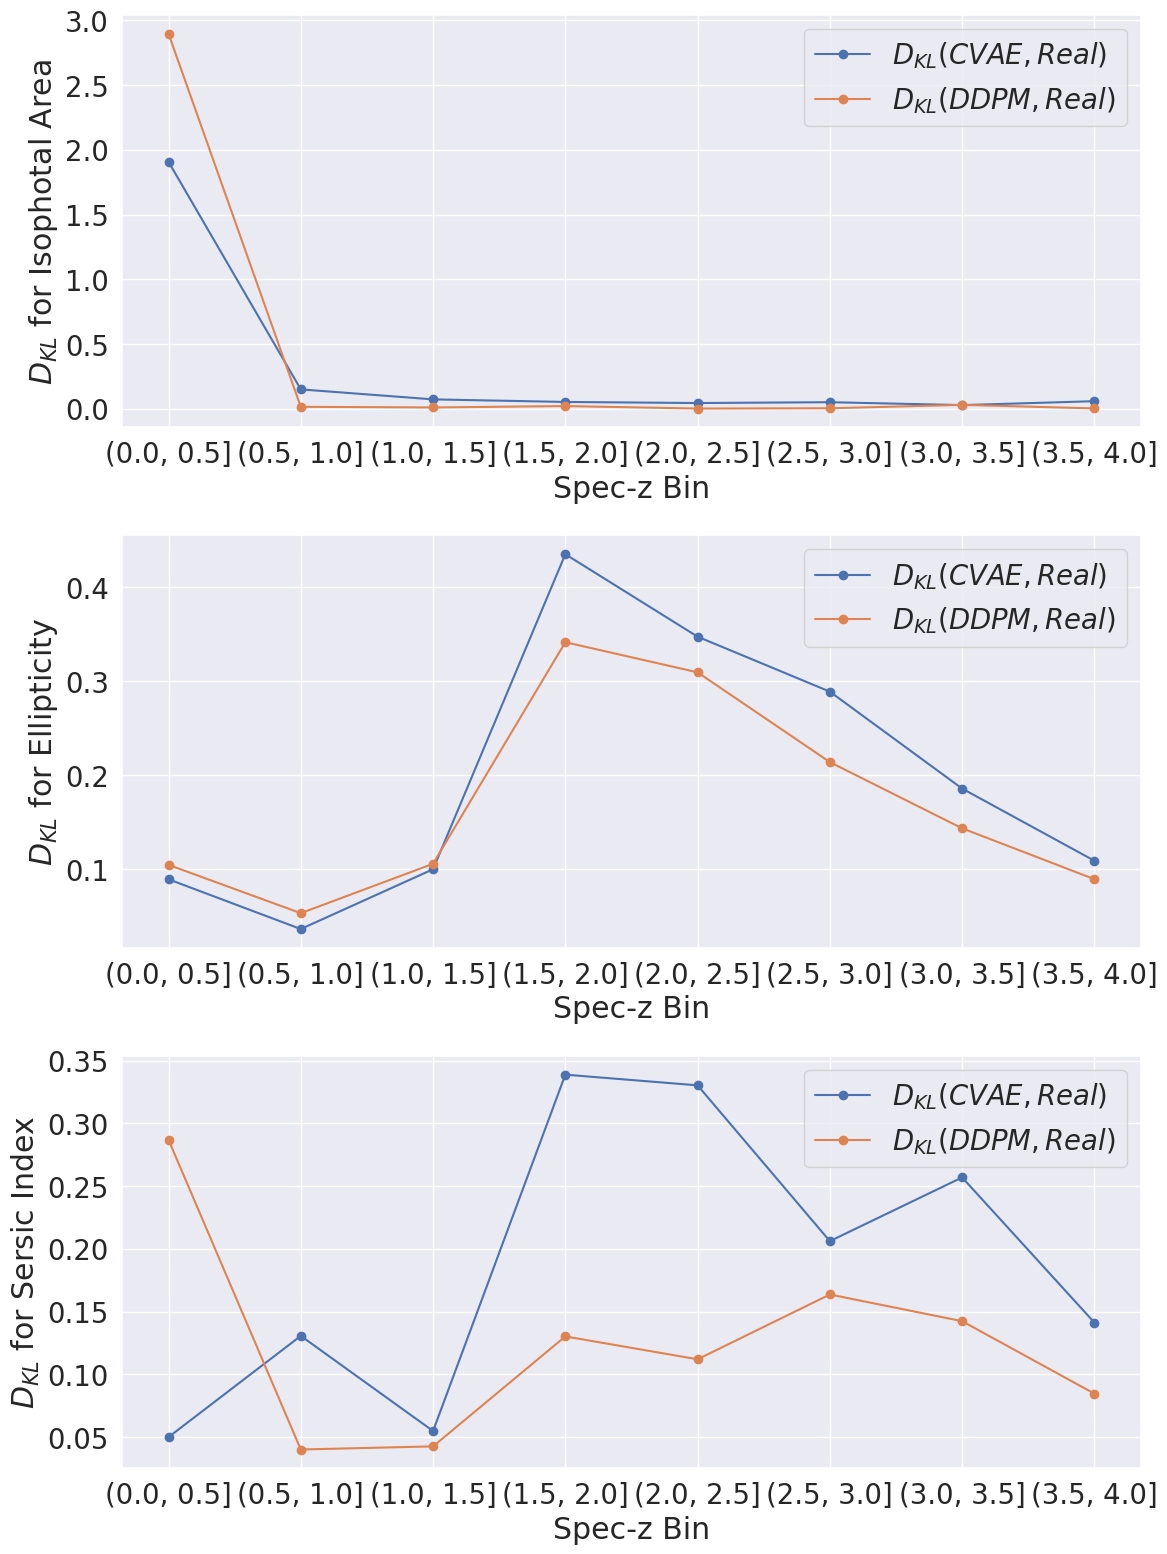

In [51]:
sns.set(font_scale=1.8)
fig, axs = plt.subplots(3, 1, figsize=(12, 16))  # Adjust the figure size as needed

for i, param in enumerate(params):
    kl_divs_cvae = []
    kl_divs_ddpm = []
    bin_labels = []
    
    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting KL divergences on the i-th axis
    axs[i].plot(bin_labels, kl_divs_cvae, label='$D_{KL}(CVAE, Real)$', marker='o')
    axs[i].plot(bin_labels, kl_divs_ddpm, label='$D_{KL}(DDPM, Real)$', marker='o')
    axs[i].set_xlabel('Spec-z Bin')
    # axs[i].set_ylabel(f'KL Divergence for {param}')
    # axs[i].set_title(f'KL Divergence Across Spec-z Bins for {param}')
    axs[i].legend()

axs[0].set_ylabel('$D_{KL}$ for Isophotal Area')
axs[1].set_ylabel('$D_{KL}$ for Ellipticity')
axs[2].set_ylabel('$D_{KL}$ for Sersic Index')
    
# Adjust layout to prevent overlap
plt.tight_layout()

output_path = 'galaxy_kl_loss_detail.png'
plt.savefig(output_path)

# Display the plots
plt.show()

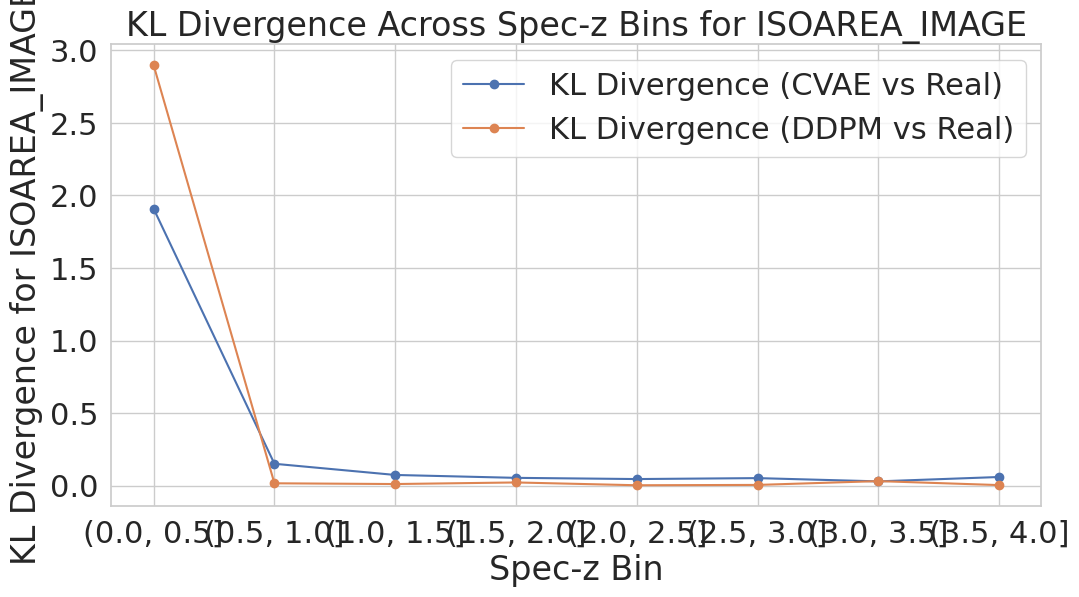

Weighted Average KL Divergence (CVAE vs Real): 1.0447563787866274
Weighted Average KL Divergence (DDPM vs Real): 1.4993583866818088


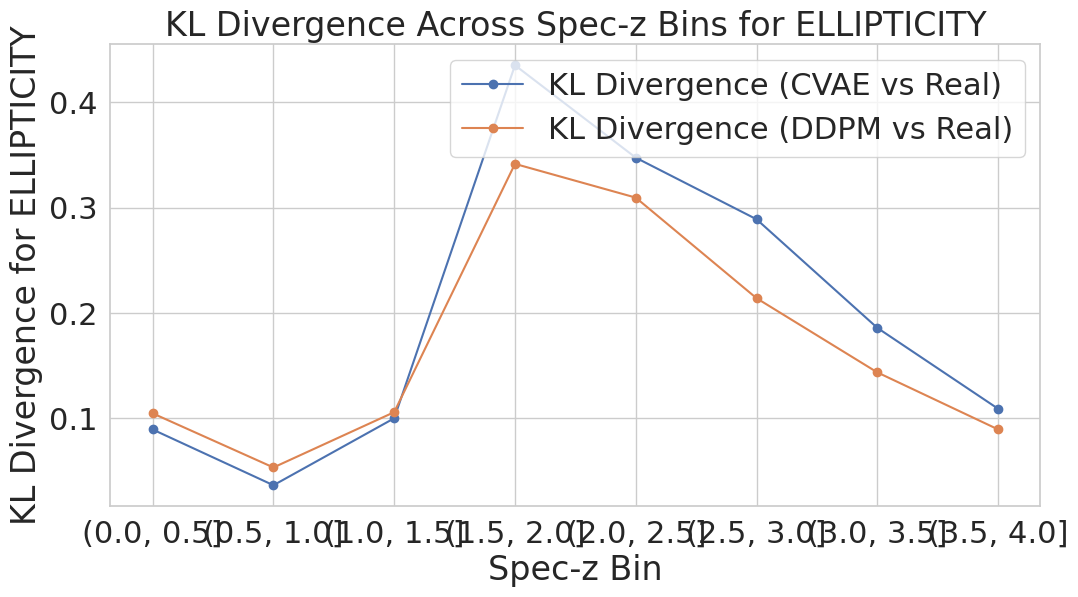

Weighted Average KL Divergence (CVAE vs Real): 0.08882450516886925
Weighted Average KL Divergence (DDPM vs Real): 0.09867319367622746


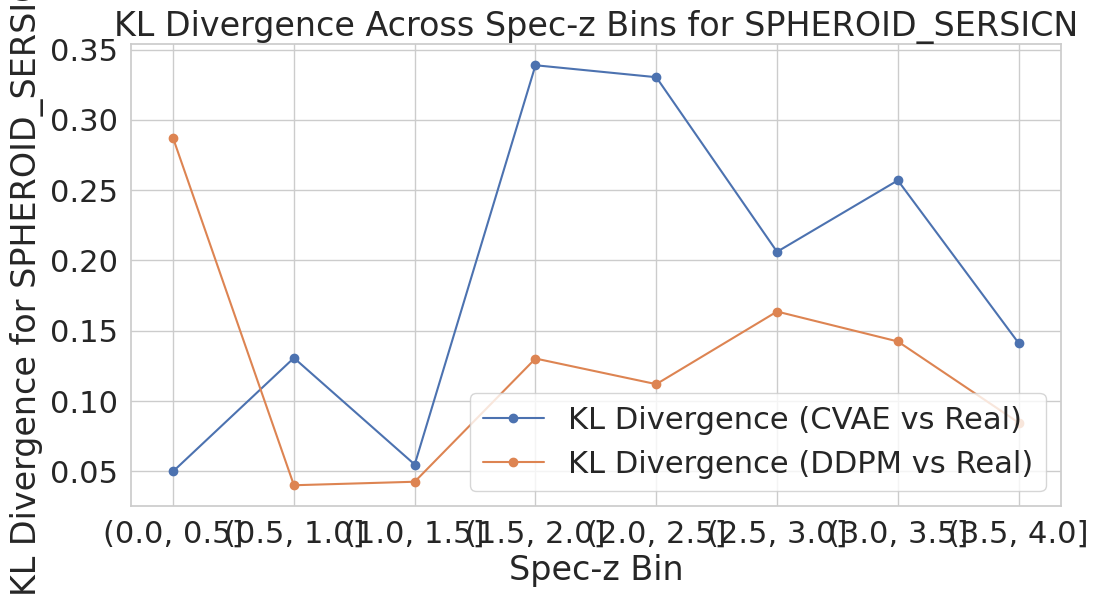

Weighted Average KL Divergence (CVAE vs Real): 0.09722104782328493
Weighted Average KL Divergence (DDPM vs Real): 0.1737125113899369


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

def create_normalized_histogram(data, bins, min_range, max_range):
    hist, bin_edges = np.histogram(data, bins=bins, density=True, range=(min_range, max_range))
    min_nonzero = np.min(hist[np.nonzero(hist)])
    hist += min_nonzero * 1e-6  # Adding 1% of the minimum non-zero value to all entries
    return hist, bin_edges

def kl_divergence(p, q):
    return entropy(p, q)

for param in params:
    kl_divs_cvae = []
    kl_divs_ddpm = []
    bin_labels = []
    
    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting KL divergences
    plt.figure(figsize=(12, 6))
    plt.plot(bin_labels, kl_divs_cvae, label='KL Divergence (CVAE vs Real)', marker='o')
    plt.plot(bin_labels, kl_divs_ddpm, label='KL Divergence (DDPM vs Real)', marker='o')
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'KL Divergence for {param}')
    plt.title(f'KL Divergence Across Spec-z Bins for {param}')
    plt.legend()
    plt.show()
    
    print(f'Weighted Average KL Divergence (CVAE vs Real): {weighted_kl_divs_cvae}')
    print(f'Weighted Average KL Divergence (DDPM vs Real): {weighted_kl_divs_ddpm}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


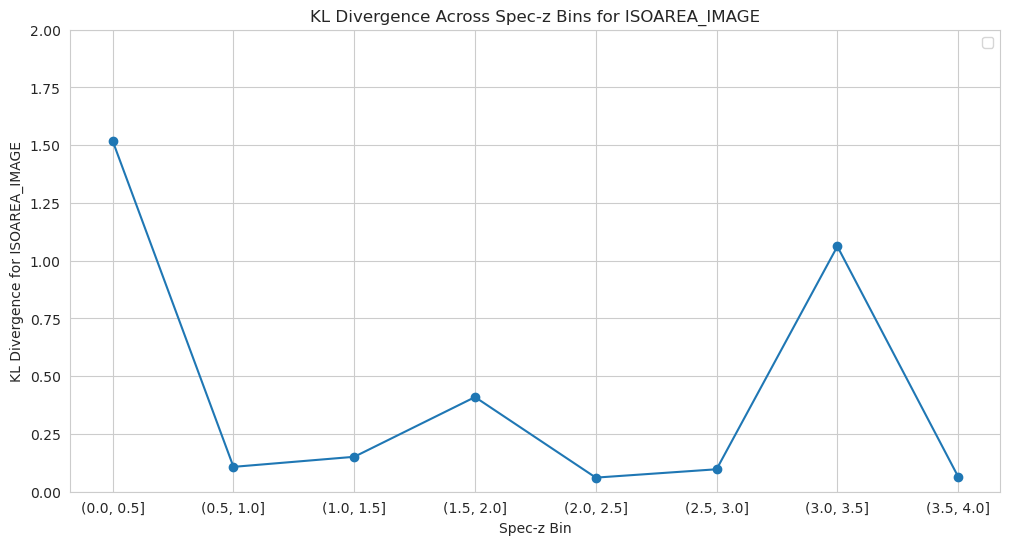

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Weighted Average KL Divergence (CVAE vs Real): 1.0447563787866274
Weighted Average KL Divergence (DDPM vs Real): 1.4993583866818088


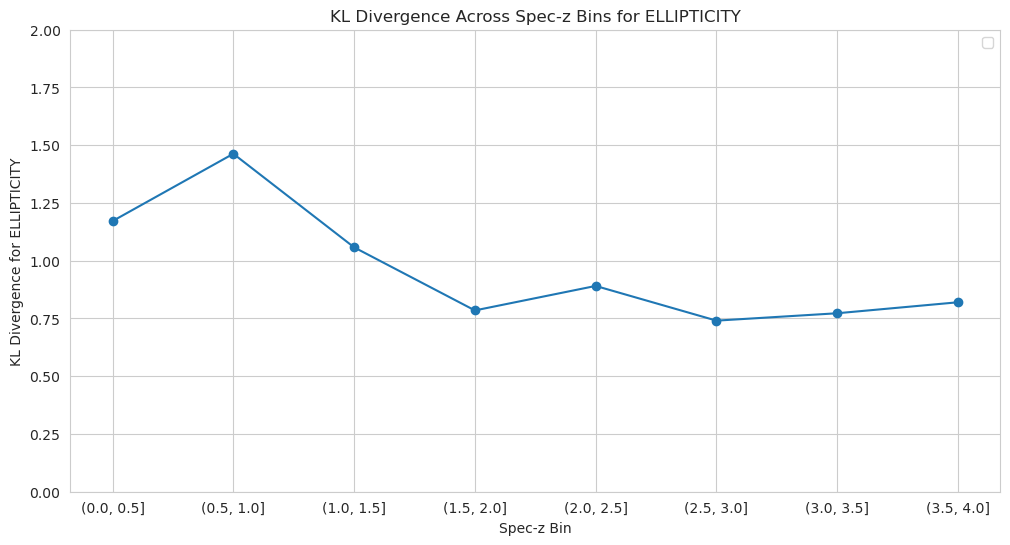

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Weighted Average KL Divergence (CVAE vs Real): 0.08882450516886925
Weighted Average KL Divergence (DDPM vs Real): 0.09867319367622746


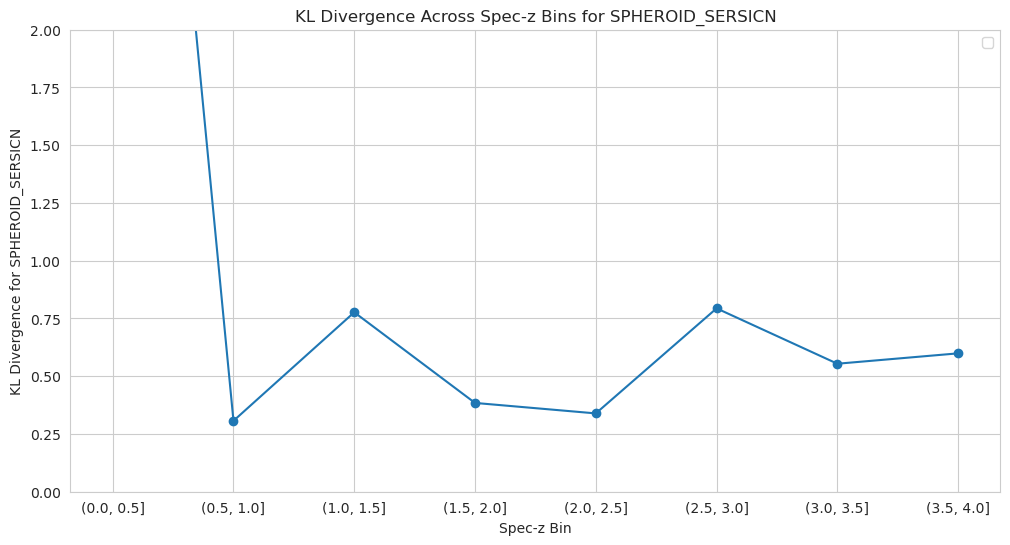

Weighted Average KL Divergence (CVAE vs Real): 0.09722104782328493
Weighted Average KL Divergence (DDPM vs Real): 0.1737125113899369


KeyError: 'ERRCXX_IMAGE'

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

def create_normalized_histogram(data, bins, min_range, max_range):
    hist, bin_edges = np.histogram(data, bins=bins, density=True, range=(min_range, max_range))
    min_nonzero = np.min(hist[np.nonzero(hist)])
    hist += min_nonzero * 1e-6  # Adding 1% of the minimum non-zero value to all entries
    return hist, bin_edges

def kl_divergence(p, q):
    return entropy(p, q)

for param in params:
    kl_divs_cvae = []
    kl_divs_ddpm = []
    bin_labels = []
    
    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting KL divergences
    plt.figure(figsize=(12, 6))
    plt.plot(bin_labels, [a / b for a, b in zip(kl_divs_ddpm, kl_divs_cvae)], marker='o')
    # plt.plot(bin_labels, kl_divs_ddpm, label='KL Divergence (DDPM vs Real)', marker='o')
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'KL Divergence for {param}')
    plt.title(f'KL Divergence Across Spec-z Bins for {param}')
    plt.legend()
    plt.ylim(0, 2)
    plt.show()
    
    print(f'Weighted Average KL Divergence (CVAE vs Real): {weighted_kl_divs_cvae}')
    print(f'Weighted Average KL Divergence (DDPM vs Real): {weighted_kl_divs_ddpm}')

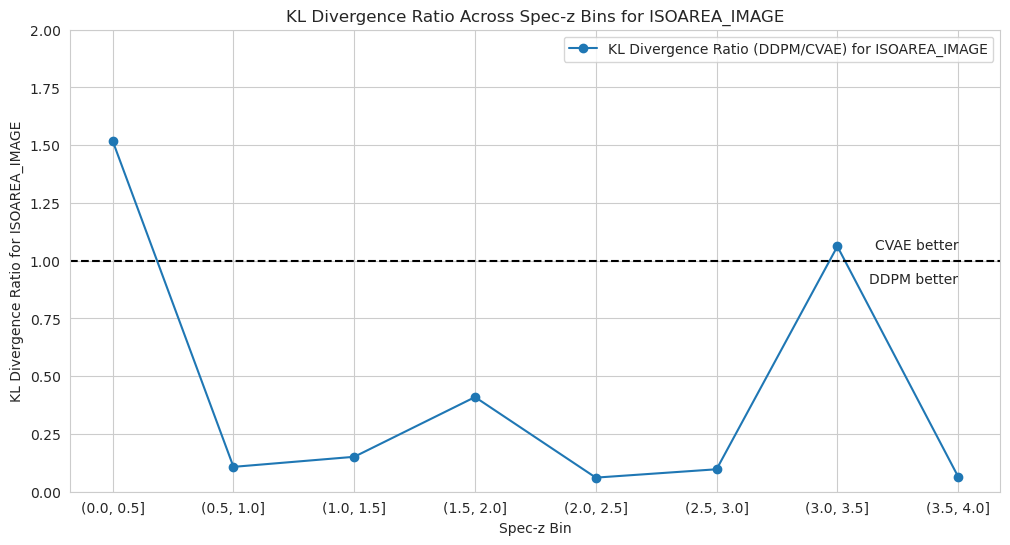

Weighted Average KL Divergence (CVAE vs Real): 1.0447563787866274
Weighted Average KL Divergence (DDPM vs Real): 1.4993583866818088


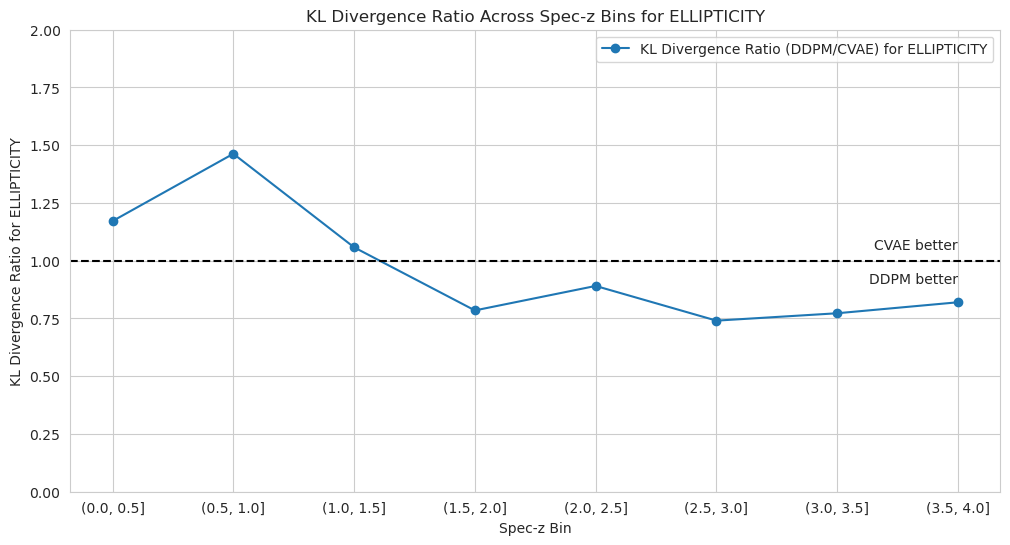

Weighted Average KL Divergence (CVAE vs Real): 0.08882450516886925
Weighted Average KL Divergence (DDPM vs Real): 0.09867319367622746


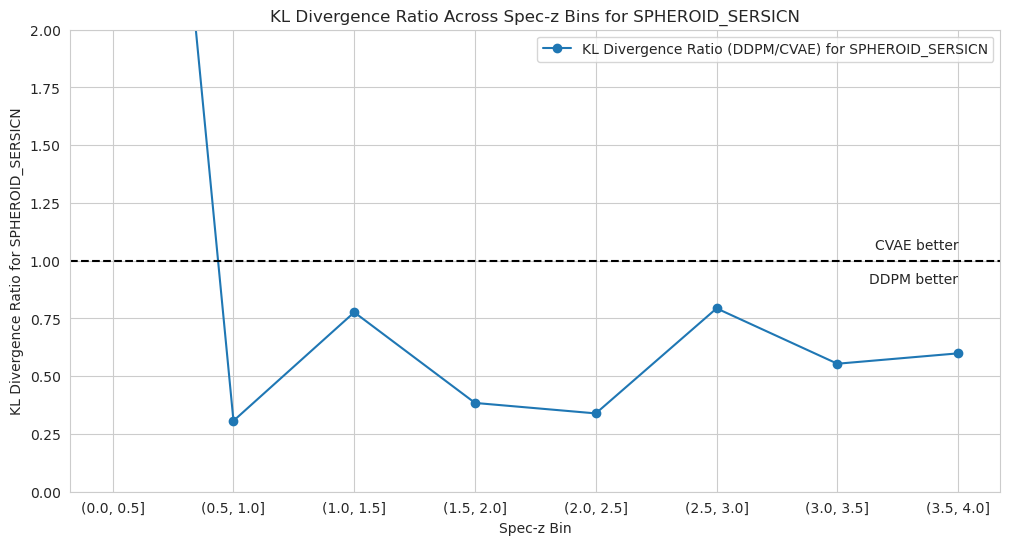

Weighted Average KL Divergence (CVAE vs Real): 0.09722104782328493
Weighted Average KL Divergence (DDPM vs Real): 0.1737125113899369


KeyError: 'ERRCXX_IMAGE'

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

def create_normalized_histogram(data, bins, min_range, max_range):
    hist, bin_edges = np.histogram(data, bins=bins, density=True, range=(min_range, max_range))
    min_nonzero = np.min(hist[np.nonzero(hist)])
    hist += min_nonzero * 1e-6  # Adding 1% of the minimum non-zero value to all entries
    return hist, bin_edges

def kl_divergence(p, q):
    return entropy(p, q)

for param in params:
    kl_divs_cvae = []
    kl_divs_ddpm = []
    bin_labels = []

    total_real_data_points = len(df_real)
    weighted_kl_divs_cvae = 0
    weighted_kl_divs_ddpm = 0

    for bin_label, group in df.groupby('specz_bins'):
        if len(group) > 1:
            bin_labels.append(str(bin_label))
            # Create histograms for each dataset
            min_range = np.min([np.min(df[param]), np.min(df_cvae[param]), np.min(df_real[param])])
            max_range = np.max([np.max(df[param]), np.max(df_cvae[param]), np.max(df_real[param])])
            hist_cvae, _ = create_normalized_histogram(df_cvae.loc[df_cvae['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_ddpm, _ = create_normalized_histogram(df.loc[df['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)
            hist_real, _ = create_normalized_histogram(df_real.loc[df_real['specz_bins'] == bin_label, param], bins=10, min_range=min_range, max_range=max_range)

            # Calculate KL divergences
            kl_div_cvae = kl_divergence(hist_real, hist_cvae)
            kl_div_ddpm = kl_divergence(hist_real, hist_ddpm)

            kl_divs_cvae.append(kl_div_cvae)
            kl_divs_ddpm.append(kl_div_ddpm)
            
            num_real_data_in_bin = len(df_real[df_real['specz_bins'] == bin_label])
            weight = num_real_data_in_bin / total_real_data_points

            # Calculate weighted KL divergence for this bin and add to total
            weighted_kl_divs_cvae += weight * kl_div_cvae
            weighted_kl_divs_ddpm += weight * kl_div_ddpm

    # Plotting KL divergences
    plt.figure(figsize=(12, 6))
    plt.plot(bin_labels, [a / b for a, b in zip(kl_divs_ddpm, kl_divs_cvae)], marker='o', label=f'KL Divergence Ratio (DDPM/CVAE) for {param}')
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'KL Divergence Ratio for {param}')
    plt.title(f'KL Divergence Ratio Across Spec-z Bins for {param}')
    plt.legend()

    # Add horizontal line at y=1
    plt.axhline(y=1, color='black', linestyle='--')

    # Add text annotations
    plt.text(len(bin_labels)-1, 1.05, 'CVAE better', horizontalalignment='right')
    plt.text(len(bin_labels)-1, 0.95, 'DDPM better', horizontalalignment='right', verticalalignment='top')

    plt.ylim(0, 2)
    plt.show()
    
    print(f'Weighted Average KL Divergence (CVAE vs Real): {weighted_kl_divs_cvae}')
    print(f'Weighted Average KL Divergence (DDPM vs Real): {weighted_kl_divs_ddpm}')

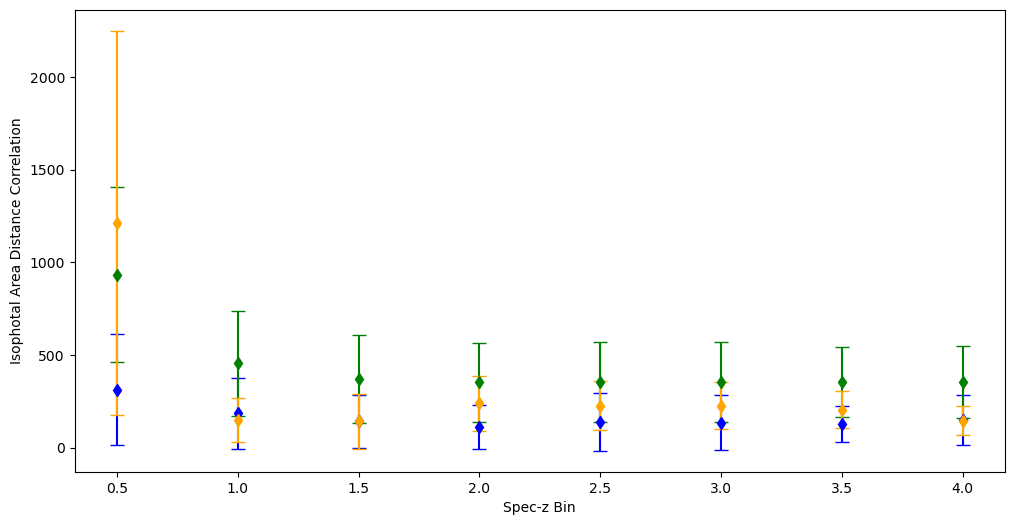

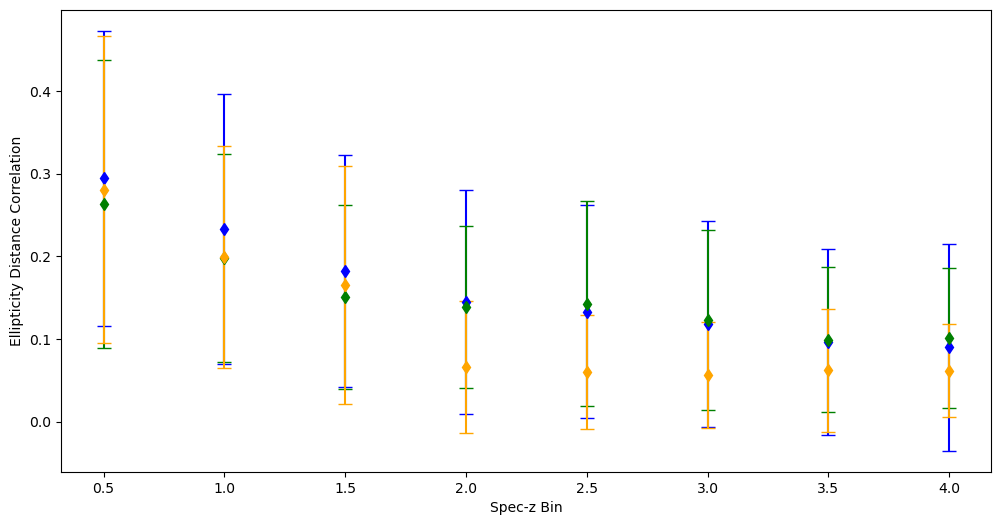

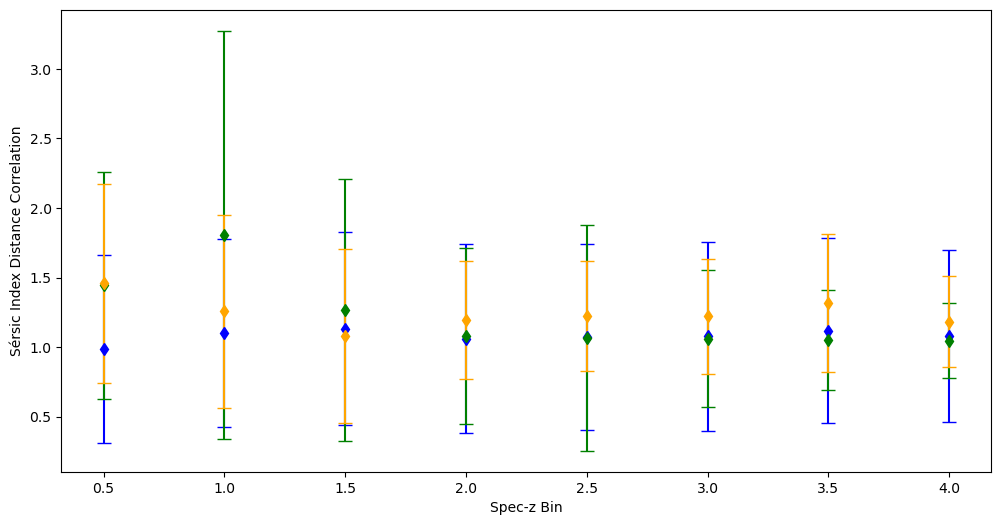

In [10]:
df = pd.read_csv('/data/HSC_generated/HSC_generated_v1/ddpm/g_band_ddpm/shape_parameters.csv')
df_cvae = pd.read_csv('/data/HSC_generated/HSC_generated_v1/cvae/g_band_cvae/shape_parameters.csv')
df_real = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')

bins = np.arange(0, 4+0.5, 0.5)
df['specz_bins'] = pd.cut(df['specz'], bins=bins)
df_cvae['specz_bins'] = pd.cut(df_cvae['specz'], bins=bins)
df_real['specz_bins'] = pd.cut(df_real['specz'], bins=bins)
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']



for i, param in enumerate(params):
    
    def calculate_mean(bin):
        if len(bin) > 1:
            # print(np.mean(bin[param]))
            return np.mean(bin[param])
        else:
            return np.nan
        
    def calculate_std(bin):
        if len(bin) > 1:
            # print(np.mean(bin[param]))
            return np.std(bin[param])
        else:
            return np.nan
    mean_results = df.groupby('specz_bins').apply(calculate_mean)
    std_results = df.groupby('specz_bins').apply(calculate_std)
    
    mean_results_cvae = df_cvae.groupby('specz_bins').apply(calculate_mean)
    std_results_cvae = df_cvae.groupby('specz_bins').apply(calculate_std)
    
    mean_results_real = df_real.groupby('specz_bins').apply(calculate_mean)
    std_results_real = df_real.groupby('specz_bins').apply(calculate_std)
    
    mean_df = mean_results.reset_index()
    mean_df.columns = ['specz_bin', 'mean']
    mean_df['specz_bin'] = mean_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    
    mean_df_cvae = mean_results_cvae.reset_index()
    mean_df_cvae.columns = ['specz_bin', 'mean']
    mean_df_cvae['specz_bin'] = mean_df_cvae['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    
    mean_df_real = mean_results_real.reset_index()
    mean_df_real.columns = ['specz_bin', 'mean']
    mean_df_real['specz_bin'] = mean_df_real['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    
    plt.figure(figsize=(12,6))
    plt.errorbar(x=mean_df['specz_bin'], y=mean_df['mean'], yerr=std_results, fmt='d', capsize=5, color = 'blue', ecolor='blue', label='Exp decay')
    
    plt.errorbar(x=mean_df['specz_bin'], y=mean_df_cvae['mean'], yerr=std_results_cvae, fmt='d', capsize=5, color = 'green', ecolor='green', label='Exp decay')
    
    plt.errorbar(x=mean_df_real['specz_bin'], y=mean_df_real['mean'], yerr=std_results_real, fmt='d', capsize=5, color = 'orange', ecolor='orange', label='Exp decay')
    # sns.barplot(x='specz_bin', y='corr', data=corr_df, color='blue')
    # plt.xticks(rotation=45)
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'{param_names[i]} Distance Correlation')
    plt.show()

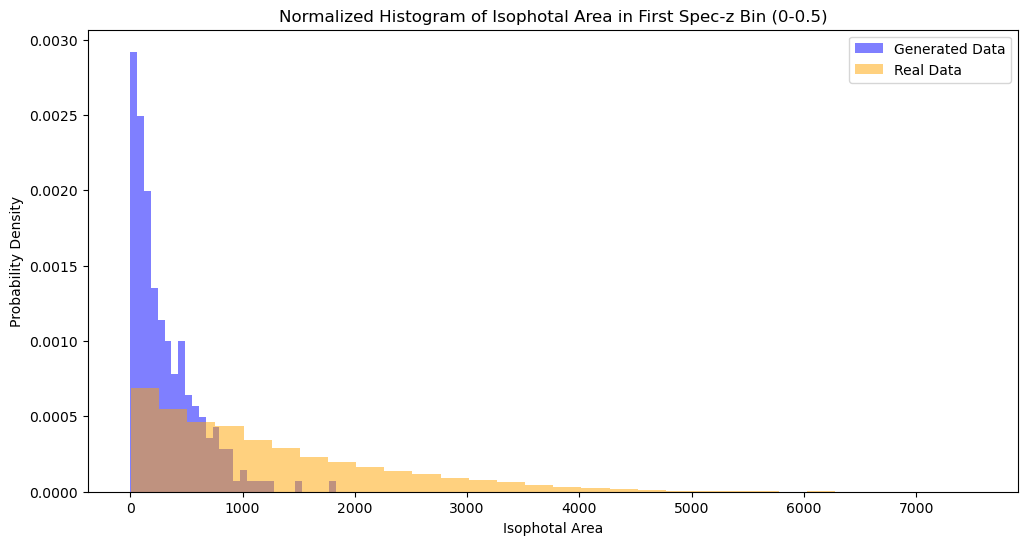

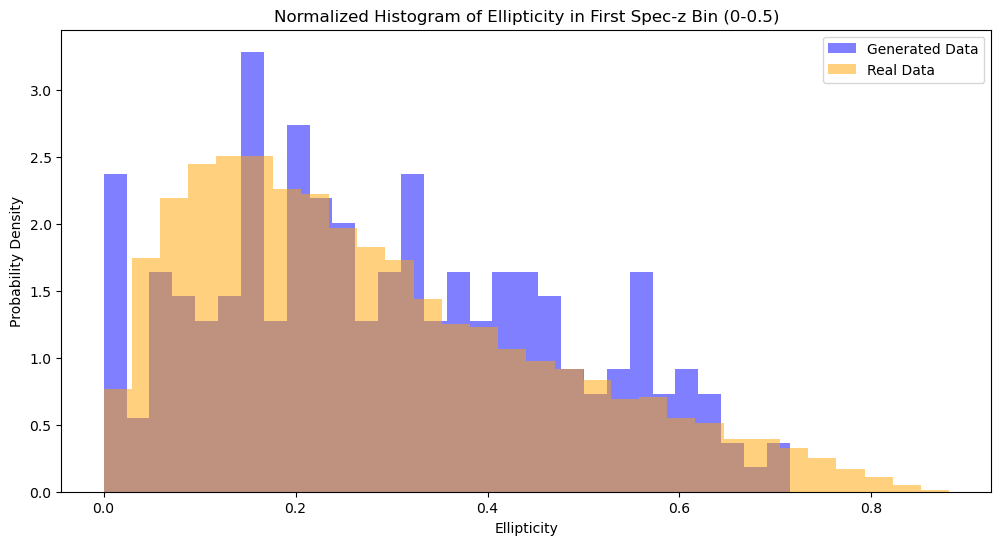

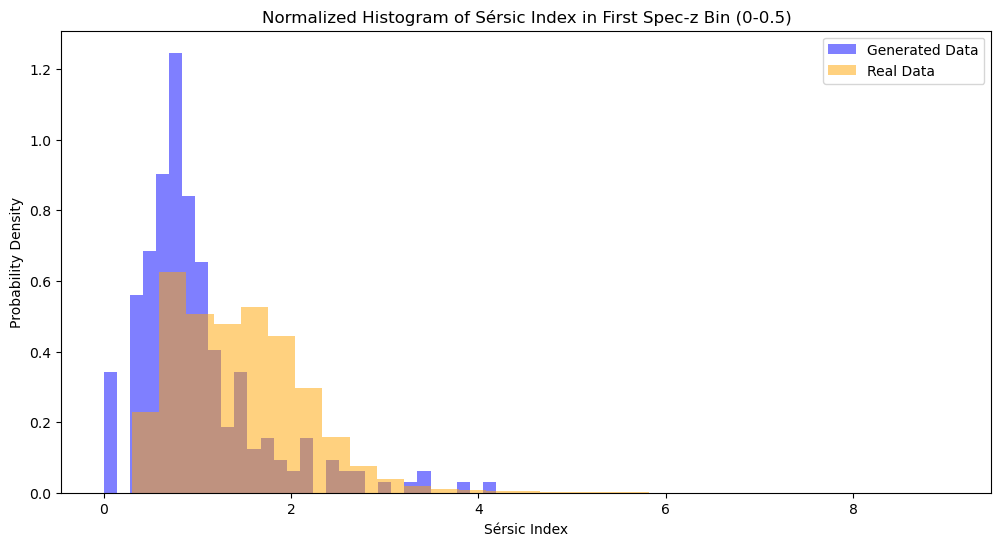

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataframes (df and df_real) are already loaded as per your code

# Define the bins
bins = np.arange(0, 4+0.5, 0.5)
df['specz_bins'] = pd.cut(df['specz'], bins=bins)
df_real['specz_bins'] = pd.cut(df_real['specz'], bins=bins)

# Parameters to plot
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

# Filter data for the first bin (0 to 0.5)
first_bin = df[df['specz_bins'] == pd.Interval(0, 0.5, closed='right')]
first_bin_real = df_real[df_real['specz_bins'] == pd.Interval(0, 0.5, closed='right')]

# Plotting histograms for each parameter in the first bin
for i, param in enumerate(params):
    plt.figure(figsize=(12, 6))
    
    # Normalized histogram for generated data
    plt.hist(first_bin[param], bins=30, alpha=0.5, label='Generated Data', color='blue', density=True)
    
    # Normalized histogram for real data
    plt.hist(first_bin_real[param], bins=30, alpha=0.5, label='Real Data', color='orange', density=True)

    plt.xlabel(param_names[i])
    plt.ylabel('Probability Density')
    plt.title(f'Normalized Histogram of {param_names[i]} in First Spec-z Bin (0-0.5)')
    plt.legend()
    plt.show()

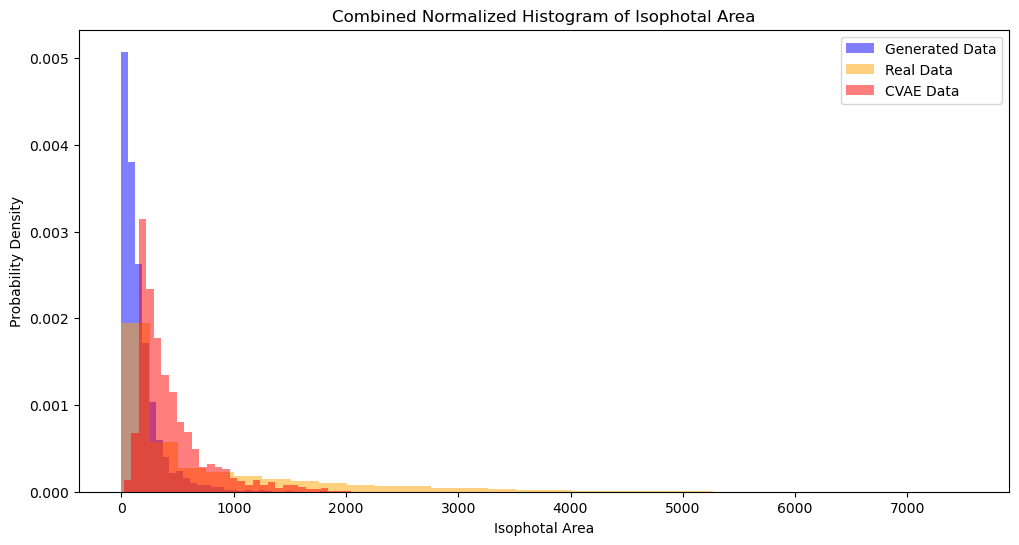

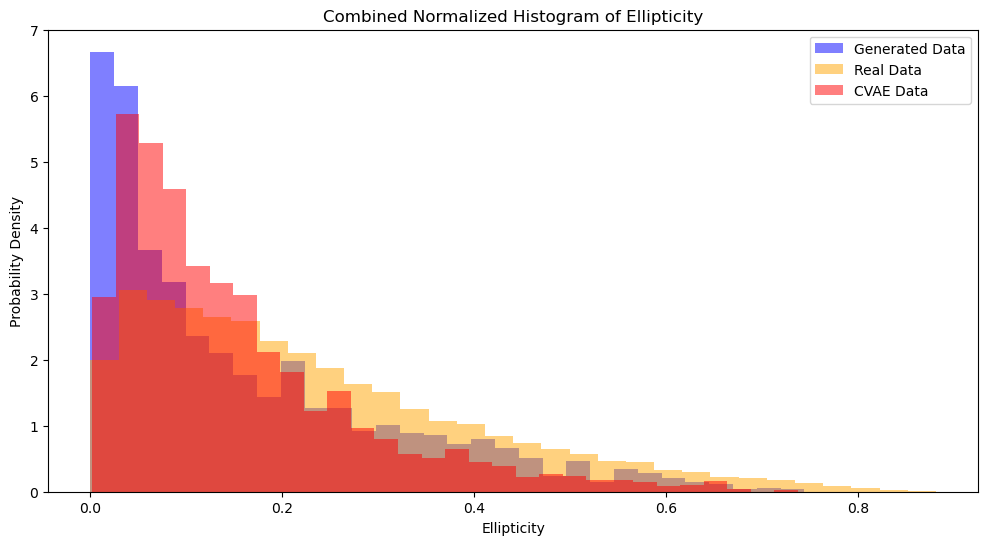

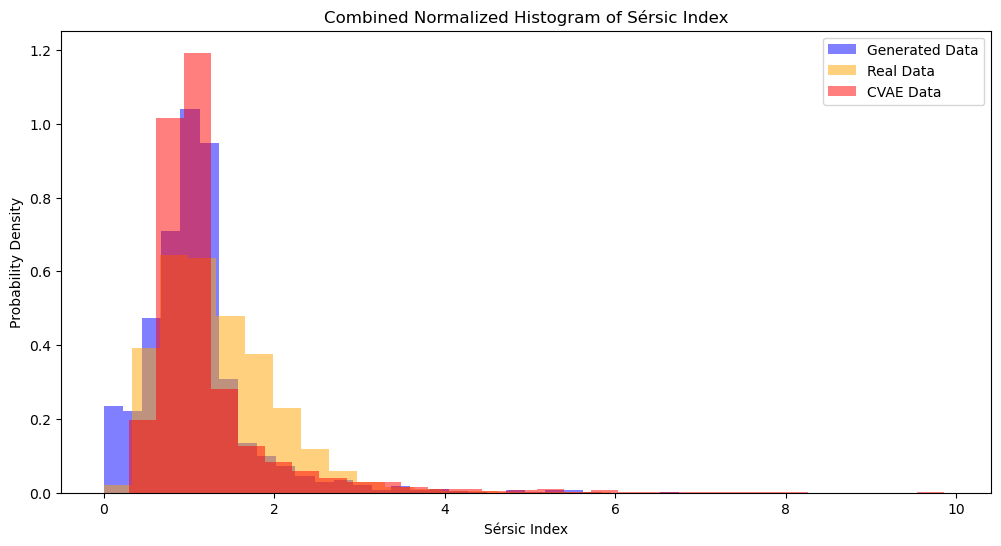

In [21]:
# Plotting combined normalized histograms for each parameter
for i, param in enumerate(params):
    plt.figure(figsize=(12, 6))

    # Normalized histogram for generated data
    plt.hist(df[param], bins=30, alpha=0.5, label='Generated Data', color='blue', density=True)

    # Normalized histogram for real data
    plt.hist(df_real[param], bins=30, alpha=0.5, label='Real Data', color='orange', density=True)

    
    plt.hist(df_cvae[param], bins=30, alpha=0.5, label='CVAE Data', color='red', density=True)

    plt.xlabel(param_names[i])
    plt.ylabel('Probability Density')
    plt.title(f'Combined Normalized Histogram of {param_names[i]}')
    plt.legend()
    plt.show()